In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np

In [3]:
cd ../

/home/lincolnzjx/Desktop/Interpretation


In [4]:
pwd

'/home/lincolnzjx/Desktop/Interpretation'

In [5]:
def main(cuda, exp, alpha, beta, gamma, selected_layer, selected_filter,
         class_index, num_class, re_size, dataset, backbone, img_index, mode,
         inter, defensed):
    resume = "037-0"
    server = 'desktop'
    n_epochs = 10000
    seed = -1
    eval_frequency = 1000
    delta = 0
    batch_size = 1 if mode else num_class
    lr = 10
    
    !CUDA_VISIBLE_DEVICES=$cuda python -u -W ignore src/trainer.py \
        --experiment_index $exp\
        --alpha=$alpha \
        --gamma=$gamma \
        --beta=$beta \
        --selected_layer=$selected_layer \
        --selected_filter=$selected_filter \
        --num_class=$num_class \
        --class_index=$class_index \
        --server $server\
        --dataset $dataset\
        --n_epochs $n_epochs \
        --eval_frequency=$eval_frequency \
        --re_size $re_size \
        --backbone=$backbone \
        --optimizer=SGD \
        --learning_rate $lr \
        --delta=$delta \
        --resume $resume \
        --mode=keep \
        --inter=False \
        --regularization=L1 \
        --seed $seed \
        --img_index $img_index\
        --batch_size $batch_size\
        --inter $inter\
        --defensed $defensed\
        --scheduler

# Read From excel

In [6]:
excel_path = "./src/exps.xlsx"
sheet = "ImageNet"
excepts = []

# ALL YOU NEED TO SET HERE!!

In [7]:
exp_index = "x101801"

# Main

In [8]:
xlsx = pd.ExcelFile(excel_path)
excel = pd.read_excel(xlsx, sheet, dtype={"exp": str, 
                                          "Done": str,
                                          "selected_layer": int,
                                          "selected_filter": int, 
                                          "Alpha": int,
                                          "Beta": int,
                                          "Gamma": int,
                                          "cuda": int,
                                          "class_index": int,
                                          "num_class": int,
                                          "re_size": int,
                                          "dataset": str,
                                          "backbone": str, 
                                          "mode":str}).values

for data in excel:
    exp, done, selected_layer, selected_filter, alpha, beta, gamma, cuda, \
        class_index, num_class, re_size, dataset, backbone, mode, inter, \
        defensed = data
    if exp != exp_index:
        continue
        
    exp = exp.replace("x", "")
    if exp in excepts:
        print("=> Skip")
    else:
        if done == "N":
            for img_index in range(30):
                if img_index == 1:
                    print("=> RUN on ", cuda, exp, selected_layer, selected_filter, 
                          class_index, "img_index ", img_index)
                    main(cuda, exp, alpha, beta, gamma, selected_layer, 
                         selected_filter, class_index, num_class, re_size, dataset,
                         backbone, img_index, mode, inter, defensed)

=> RUN on  0 101801 1 16 950 img_index  1
==================== basic setting start ====================
experiment_index    : 101801
cuda                : 0
num_workers         : 2
dataset             : ImageNet
data_dir            : /media/lincolnzjx/HardDisk/Datasets/
resume              : 037-0
n_epochs            : 10000
learning_rate       : 10.0
batch_size          : 1
seed                : -1
eval_frequency      : 1000
log_dir             : ./saved/logdirs
model_dir           : ./saved/models
generated_dir       : ./saved/generated
eps                 : 1e-07
weight_decay        : 0
momentum            : 0.9
input_size          : 224
backbone            : vgg16
re_size             : 224
optimizer           : SGD
warmup_epochs       : -1
initialization      : default
prof                : False
print_freq          : 10
selected_filter     : 16
selected_layer      : 1
alpha               : 1.0
beta                : 1.0
gamma               : 1.0
class_index         : [950]
num_clas

# Visualization

In [11]:
import pickle

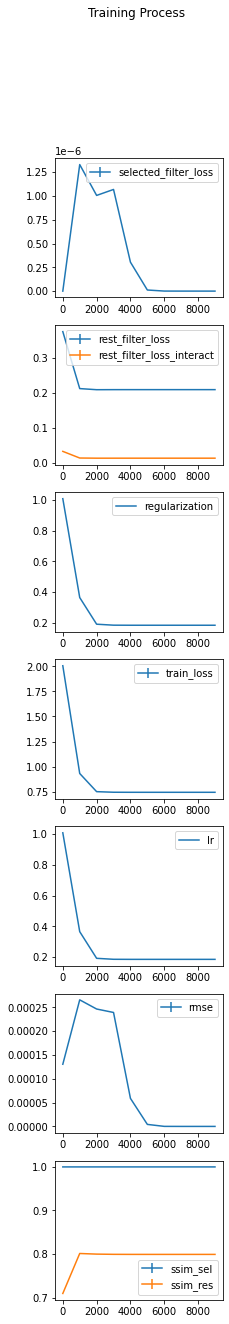

In [12]:
statistic_dir = "/home/lincolnzjx/Desktop/Interpretation/saved/generated/101801/*.pl"

selected_filter_losses = []
rest_filter_losses = []
rest_filter_loss_interactes = []
regularization_losses = []
rest_filter_loss_interact = []
lres = []
rmses_meanes = []
ssim_sel_meanes = []
ssim_res_meanes = []
losses = []

for item in glob.glob(statistic_dir):
    # load data 
    with open(item, "rb") as handle:
          statistic = pickle.load(handle)
    epoch = statistic["epoch"]
    loss = statistic["losses"]
    selected_filter_loss = statistic["selected_filter_loss"]
    rest_filter_loss = statistic["rest_fileter_loss"]
    rest_filter_loss_interact = statistic["rest_filter_loss_interact"]
    regularization_loss = statistic["regularization_loss"]
    lr = statistic["lr"]
    # best = statistic["best"][0]
    
    metric_statistic = statistic["metric_statistic"]
    rmses_mean = [ms["rmses_mean"] for ms in metric_statistic]
    ssim_sel_mean = [ms["ssim_sel_mean"] for ms in metric_statistic]
    ssim_res_mean = [ms["ssim_res_mean"] for ms in metric_statistic]
    
    selected_filter_losses.append(selected_filter_loss)
    rest_filter_losses.append(rest_filter_loss)
    rest_filter_loss_interactes.append(rest_filter_loss_interact)
    regularization_losses.append(regularization_loss)
    lres.append(regularization_loss)
    rmses_meanes.append(rmses_mean)
    ssim_sel_meanes.append(ssim_sel_mean)
    ssim_res_meanes.append(ssim_res_mean)
    losses.append(loss)
    # print("sf: min:{:.3f} max:{:.3f}".format(min(selected_filter_loss), max(selected_filter_loss)))
    # print("rf: min:{:.3f} max:{:.3f}".format(min(rest_filter_loss), max(rest_filter_loss)))
    # print("rfi: min:{:.3f} max:{:.3f}".format(min(rest_filter_loss_interact), max(rest_filter_loss_interact)))
    # print("rg: min:{:.3f} max:{:.3f}".format(min(regularization_loss), max(regularization_loss)))
    # print("rmse: min:{:.3f} max:{:.3f}".format(min(rmses_mean), max(rmses_mean)))
    # print("ssim_sel: min:{:.3f}, max:{:.3f}".format(min(ssim_sel_mean), max(ssim_sel_mean)))
    # print("ssim_res: min:{:.3f}, max:{:.3f}".format(min(ssim_res_mean), max(ssim_res_mean)))
    # print("-"*50)
    # for key, name in best.items():
    #     if key != "processed_images":
    #         print(key, name)
    
fig = plt.figure(figsize=(3, 21))
fig.add_axes(sharex=True)
x = epoch

ax = plt.subplot(711)
# plt.plot(epoch, selected_filter_loss, label="selected_filter_loss")
y = np.mean(selected_filter_losses, axis=0)
yerr = np.std(selected_filter_losses, axis=0)
plt.errorbar(epoch, y, yerr=yerr, label="selected_filter_loss")
# plt.errorbar(, , yerr=yerr, label='both limits (default)')
plt.legend(loc='best')
    
plt.subplot(712)
y = np.mean(rest_filter_losses, axis=0)
yerr = np.std(rest_filter_losses, axis=0)
plt.errorbar(x, y, yerr=yerr, label="rest_filter_loss")
y = np.mean(rest_filter_loss_interactes, axis=0)
yerr = np.std(rest_filter_loss_interactes, axis=0)
plt.errorbar(x, y, yerr=yerr, label="rest_filter_loss_interact")
# plt.plot(epoch, rest_filter_loss_interact, label="rest_filter_loss_interact")
plt.legend(loc='best')

plt.subplot(713)
y = np.mean(regularization_losses, axis=0)
yerr = np.std(regularization_losses, axis=0)
plt.errorbar(epoch, regularization_loss, label="regularization")
plt.legend(loc='best')

plt.subplot(714)
y = np.mean(losses, axis=0)
yerr = np.std(losses, axis=0)
plt.errorbar(epoch, y, yerr=yerr, label="train_loss")
plt.legend(loc='best')

plt.subplot(715)
y = np.mean(lres, axis=0)
yerr = np.std(lres, axis=0)
plt.errorbar(epoch, y, label="lr")
plt.legend(loc='best')

plt.subplot(716)
y = np.mean(rmses_meanes, axis=0)
yerr = np.std(rmses_meanes, axis=0)
plt.errorbar(epoch, y, yerr=yerr, label="rmse")
plt.legend(loc='best')

plt.subplot(717)
y = np.mean(ssim_sel_meanes, axis=0)
yerr = np.std(ssim_sel_meanes, axis=0)
plt.errorbar(epoch, y, yerr=yerr, label="ssim_sel")
y = np.mean(ssim_res_meanes, axis=0)
yerr = np.std(ssim_res_meanes, axis=0)
plt.errorbar(epoch, y, yerr=yerr, label="ssim_res")
plt.legend(loc='best')

plt.suptitle('Training Process')
plt.show()